In [2]:
import sys
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import corner
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator
from DependenceFitter import DependenceFitter1,DependenceFitter2
from DependenceFitter import median_and_error,get_computed_jpm, tau0_to_tau1
JPM, rho_iter = get_computed_jpm()

# Fig1. JPM

Text(-0.35, 0.018, '$\\log \\rho_{\\rm in} = -0.5 $')

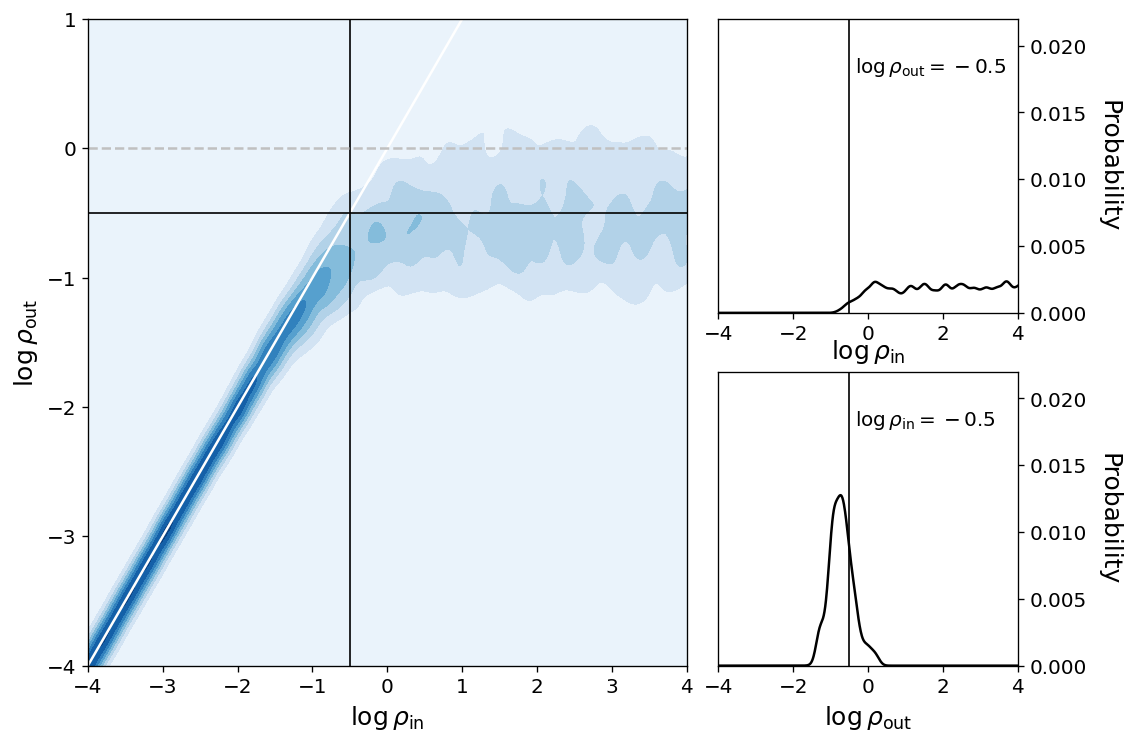

In [3]:
H2 = JPM[-1]
fig = plt.figure(figsize=(10,7), dpi=120,facecolor='white')

gs = gridspec.GridSpec(2, 2, height_ratios=[0.5,0.5], width_ratios=[0.8,0.4])
gs.update(hspace=0.2)
gs.update(wspace=0.07)

ax0 = fig.add_subplot(gs[:,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])
ax0.contourf(rho_iter,rho_iter, H2,cmap='Blues')

ax0.set_xlim(-4,4)
ax0.set_ylim(-4,1)

ax0.plot(np.arange(-4,5),np.arange(-4,5),'w-')
# ax.axvline(-3, color='k', ls='--')
# ax.axhline(-3, color='k', ls='--')
ax0.axvline(-0.5, color='k', ls='-', lw=1)
ax0.axhline(-0.5, color='k', ls='-', lw=1)
ax0.axhline(0 , color='silver', ls='--')
# ax0.axhline(np.log10(0.07), color='silver', ls='--')
ax0.set_ylabel(r"$\log \rho_{\rm out} $", fontsize=15)
ax0.set_xlabel(r"$\log \rho_{\rm in} $", fontsize=15)
ax0.tick_params(axis='both', labelsize=12)

ind = np.argmin(np.abs(rho_iter - np.log10(0.5)))
ax1.plot(rho_iter, H2[ind,:]/np.sum(H2[ind,:]), color='k')
ax1.axvline(-0.5, color='k',lw=1)
ax1.set_ylim(0,0.022)
ax1.set_xlim(-4,4)
ax1.set_xlabel(r"$\log \rho_{\rm in} $", fontsize=15,labelpad=5,va='center',ha='center')

ax1.set_ylabel(r"Probability",fontsize=15, rotation=-90,labelpad=20,va='bottom',ha='center')
ax1.yaxis.set_major_locator(MultipleLocator(0.005))
ax1.text(-0.35,0.018,r"$\log \rho_{\rm out} = -0.5 $",fontsize=12)
ax1.tick_params(axis='y', which='both',labelright=True, labelleft=False,right=True, left=False)
ax1.yaxis.set_label_position('right')
ax1.tick_params(axis='both', labelsize=12)

ax2.plot(rho_iter, H2[:,ind]/np.sum(H2[:,ind]), color='k')
ax2.set_ylim(0,0.022)
ax2.set_xlim(-4,4)
ax2.axvline(-0.5, color='k',lw=1)
ax2.set_xlabel(r"$\log \rho_{\rm out} $", fontsize=15)
ax2.set_ylabel(r"Probability",fontsize=15, rotation=-90,labelpad=20,va='bottom',ha='center')
ax2.yaxis.set_major_locator(MultipleLocator(0.005))
ax2.tick_params(axis='y', which='both',labelright=True, labelleft=False,right=True, left=False)
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='both', labelsize=12)
ax2.text(-0.35,0.018,r"$\log \rho_{\rm in} = -0.5 $",fontsize=12)
# fig.savefig("fig1.png",bbox_inches="tight")

In [4]:
np.random.seed(7)
n_samples = 500
noise = 0.2
logMBH_array = np.random.uniform(5, 11, n_samples)
baseline = np.random.uniform(10,1e3,n_samples)
n_cadence = np.random.uniform(10,1e3,n_samples)

tau_in = np.random.normal(0.5*logMBH_array-1.8, noise)
tau_m, tau_std = tau0_to_tau1(tau_in, baseline, n_cadence)
tau =  np.random.normal(tau_m, tau_std)

choice = np.random.choice(np.where(10**tau < baseline)[0], size=100)
mask = 10**tau_m[choice] < 0.1 * baseline[choice]
np.polyfit(logMBH_array, tau_in,deg=1)

array([ 0.50176116, -1.81742398])

In [5]:
tau = tau[choice]
baseline = baseline[choice]
n_cadence = n_cadence[choice]
log_M_BH = logMBH_array[choice]
flat_samples = DependenceFitter1(tau, baseline,n_cadence, log_M_BH).fit()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 181.81it/s]


[ 0.40875499 -1.31955163]
[0.19801839 0.04098711]


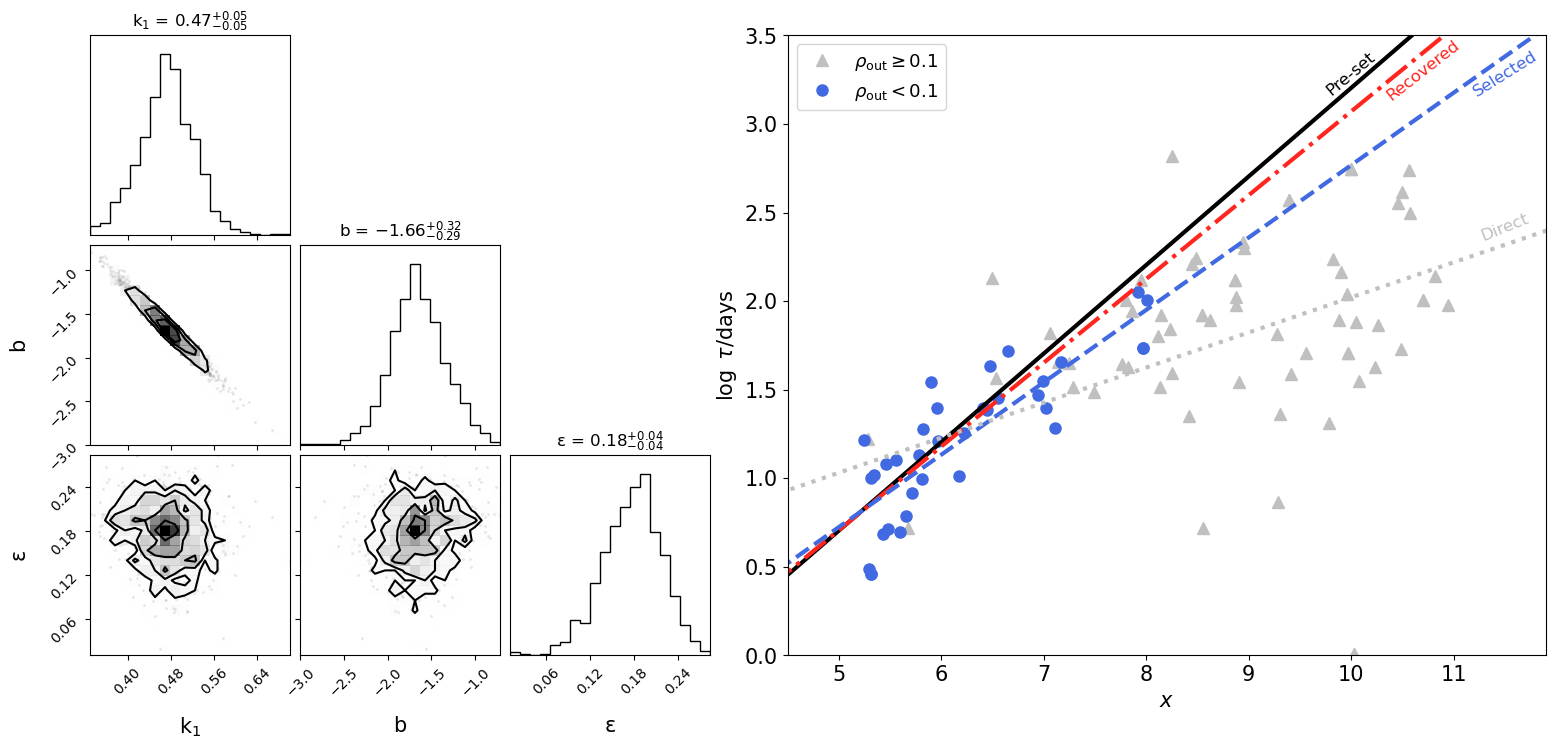

In [6]:
x_iter = np.arange(3,13)
fig_corner = corner.corner(
    flat_samples,show_titles=True,labels=[r"$\rm k_1$",r"$\rm b$",r"$\rm \epsilon$"],
    label_kwargs = dict(fontsize=15), title_kwargs=dict(fontsize=12),
    figsize=(8,6)
);
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig_corner)
ax = fig_corner.add_subplot(gs[:, -1])
box = ax.get_position()
box.x0 = box.x0 + 0.5
box.x1 = box.x1 + 1.1
ax.set_position(box)

ax.plot(log_M_BH[~mask], tau[~mask], '^',markersize=8, c='silver', label=r"$\rho_{\rm out}\geq 0.1$")
ax.plot(log_M_BH[mask], tau[mask], 'o', markersize=8, c='royalblue', label=r"$\rho_{\rm out}< 0.1$")
ax.plot(x_iter, np.log10(160*10**(0.5*(x_iter-8))), lw=3,color='k')
ax.text(10, np.log10(160*10**(0.5*(10-8)))+0.08, "Pre-set", rotation=40, ha='center', va='center', color='k', fontsize=12)
ax.plot(x_iter, np.poly1d([np.median(flat_samples[:,0]), np.median(flat_samples[:,1])])(x_iter), lw=3,ls='-.',color='#FF261F')
ax.text(10.7, np.poly1d([np.median(flat_samples[:,0]), np.median(flat_samples[:,1])])(10.7) - 0.1, "Recovered", rotation=38, ha='center', va='center', color='#FF261F', fontsize=12)
ax.plot(x_iter, np.poly1d(np.polyfit(log_M_BH[mask], tau[mask], deg=1))(x_iter), lw=3,ls='--', color='royalblue')
ax.text(11.5, np.poly1d(np.polyfit(log_M_BH[mask], tau[mask], deg=1))(11.5) - 0.1, "Selected", rotation=32, ha='center', va='center', color='royalblue', fontsize=12)
print(np.polyfit(log_M_BH[mask], tau[mask], deg=1))

ax.plot(x_iter, np.poly1d(np.polyfit(log_M_BH, tau, deg=1))(x_iter), lw=3,ls=':', color='silver')
ax.text(11.5, np.poly1d(np.polyfit(log_M_BH, tau, deg=1))(11.5) + 0.1, "Direct", rotation=22, ha='center', va='center', color='silver', fontsize=12)
print(np.polyfit(log_M_BH, tau, deg=1))

ax.set_xlabel(r"$x$", fontsize=15)
ax.set_ylabel(r"$\log\ \tau/{\rm days}$", fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax.set_xlim(4.5,11.9)
ax.set_ylim(0,3.5)
ax.legend(fontsize=13)
# fig_corner.savefig("fig2.png",bbox_inches="tight")